# ASSIGNMENT 1

## Setup

* `$ pip install --user virtualenv`
* `$ python3 -m venv venv`
* `$ source venv/bin/activate`
* `(venv) $ pip install -r requirements.txt`
* `(venv) $ ipython kernel install --name=venv`
* **main.ipynb** > **`F1`** > `Notebook: Select Notebook Kernel` > `venv`

## Import

Before you begin to run your code, you need to load all required modules. Simply execute the code block below. This block also enables Jupyter's auto-reloading feature, so you dont need to re-import modules whenever you change them.

In [1]:
# In order to import from the python file without hassle, we add the current
# directory to the python path
import sys; sys.path.append(".")

# Auto-reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Neural Network

In [2]:
from src.network import load_data_cifar, validation_split

train_file = "./data/train_data.pckl"
test_file = "./data/test_data.pckl"

train_data, train_class, test_data, test_class = load_data_cifar(
    train_file=train_file, test_file=test_file
)

data, truths, val_data, val_truths = validation_split(
    dataset=train_data, ground_truths=train_class, pct=0.1
)

In [3]:
from src.network import Network, SGD_Params

params = SGD_Params(eta=0.001, eta_decay=0.00001)

net = Network([train_data.shape[0], 128, 64, 10], optimizer="sgd", params=params)

loss, acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=60,
    mini_batch_size=24,
)
net.eval_network(test_data, test_class)

Epoch 0 | Loss: 2.2968 | Eta: 0.00097951 | Acc: 0.0847
Epoch 1 | Loss: 2.2795 | Eta: 0.00095944 | Acc: 0.1368
Epoch 2 | Loss: 2.2616 | Eta: 0.00093977 | Acc: 0.2020
Epoch 3 | Loss: 2.2457 | Eta: 0.00092051 | Acc: 0.1792
Epoch 4 | Loss: 2.2256 | Eta: 0.00090164 | Acc: 0.2150
Epoch 5 | Loss: 2.2061 | Eta: 0.00088316 | Acc: 0.2150
Epoch 6 | Loss: 2.1847 | Eta: 0.00086506 | Acc: 0.2476
Epoch 7 | Loss: 2.1642 | Eta: 0.00084733 | Acc: 0.2606
Epoch 8 | Loss: 2.1460 | Eta: 0.00082996 | Acc: 0.2704
Epoch 9 | Loss: 2.1260 | Eta: 0.00081295 | Acc: 0.2606
Epoch 10 | Loss: 2.1071 | Eta: 0.00079628 | Acc: 0.2932
Epoch 11 | Loss: 2.0902 | Eta: 0.00077996 | Acc: 0.2997
Epoch 12 | Loss: 2.0723 | Eta: 0.00076398 | Acc: 0.2964
Epoch 13 | Loss: 2.0599 | Eta: 0.00074832 | Acc: 0.2736
Epoch 14 | Loss: 2.0457 | Eta: 0.00073298 | Acc: 0.3062
Epoch 15 | Loss: 2.0337 | Eta: 0.00071795 | Acc: 0.2997
Epoch 16 | Loss: 2.0186 | Eta: 0.00070324 | Acc: 0.3322
Epoch 17 | Loss: 2.0102 | Eta: 0.00068882 | Acc: 0.3192
Ep

(1.8819111648981048, 0.3386)

In [4]:
from src.network import Network, Adam_Params

params = Adam_Params(
    eta=0.001, eta_decay=0.00001, epsilon=1e-7, beta_1=0.9, beta_2=0.999
)

net = Network([train_data.shape[0], 128, 64, 10], optimizer="adam", params=params)

loss, acc = net.train(
    training_data=data,
    training_class=truths,
    val_data=val_data,
    val_class=val_truths,
    epochs=60,
    mini_batch_size=24,
)
net.eval_network(test_data, test_class)

Epoch 0 | Loss: 1.8999 | Eta: 0.00097951 | Acc: 0.2834
Epoch 1 | Loss: 1.8376 | Eta: 0.00095944 | Acc: 0.3518
Epoch 2 | Loss: 1.8678 | Eta: 0.00093977 | Acc: 0.3062
Epoch 3 | Loss: 1.8019 | Eta: 0.00092051 | Acc: 0.3322
Epoch 4 | Loss: 1.7865 | Eta: 0.00090164 | Acc: 0.3648
Epoch 5 | Loss: 1.7305 | Eta: 0.00088316 | Acc: 0.3453
Epoch 6 | Loss: 1.7477 | Eta: 0.00086506 | Acc: 0.3518
Epoch 7 | Loss: 1.7170 | Eta: 0.00084733 | Acc: 0.3518
Epoch 8 | Loss: 1.7024 | Eta: 0.00082996 | Acc: 0.3876
Epoch 9 | Loss: 1.6477 | Eta: 0.00081295 | Acc: 0.3974
Epoch 10 | Loss: 1.6999 | Eta: 0.00079628 | Acc: 0.3746
Epoch 11 | Loss: 1.6159 | Eta: 0.00077996 | Acc: 0.4104
Epoch 12 | Loss: 1.5978 | Eta: 0.00076398 | Acc: 0.4137
Epoch 13 | Loss: 1.5489 | Eta: 0.00074832 | Acc: 0.4300
Epoch 14 | Loss: 1.5430 | Eta: 0.00073298 | Acc: 0.4072
Epoch 15 | Loss: 1.5318 | Eta: 0.00071795 | Acc: 0.3941
Epoch 16 | Loss: 1.5708 | Eta: 0.00070324 | Acc: 0.4463
Epoch 17 | Loss: 1.4991 | Eta: 0.00068882 | Acc: 0.4495
Ep

(1.5053931348324363, 0.482)

In [5]:
net.eval_network(test_data, test_class)

(1.5053931348324363, 0.482)

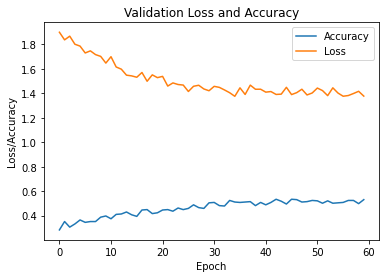

In [6]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(acc)
plt.plot(loss)
plt.title('Validation Loss and Accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.show()